In [3]:
#Author: Wesley Kirui
#Objective: Use real world data for machine learning
#Data used here is from Inside Airbnb project (http://insideairbnb.com/get-the-data.html)
# Analyze the airbnb house listings in Berlin

#Load modules
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#load dataset
DATA_PATH = "datasets"
def load_housing_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path,"listings.csv")
    return pd.read_csv(csv_path)
def load_neighborhood_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path,"neighbourhoods.csv")
    return pd.read_csv(csv_path)
def load_reviews_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path,"reviews.csv")
    return pd.read_csv(csv_path)
def load_geo_data(data_path=DATA_PATH):
    geo_path = os.path.join(data_path,"neighbourhoods.geojson")
    return gpd.read_file(geo_path)

listings = load_housing_data()
neighbourhoods = load_neighborhood_data()
reviews = load_reviews_data()
geo_data = load_geo_data()

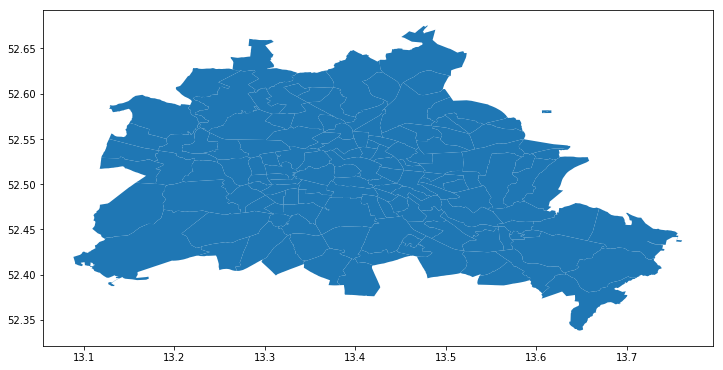

In [5]:
#cmap=plt.m.viridis
geo_data.plot(figsize=(12,10))

In [29]:
geo_data1 = gpd.GeoDataFrame(geo_data)
geo_data1.plot(hue=geo_data1['neighbourhood_group'],figsize=(12,8))

In [41]:
geo_data1['neighbourhood_group'].unique()

array(['Pankow', 'Charlottenburg-Wilm.', 'Treptow - Köpenick',
       'Marzahn - Hellersdorf', 'Reinickendorf',
       'Friedrichshain-Kreuzberg', None, 'Mitte', 'Spandau',
       'Steglitz - Zehlendorf', 'Tempelhof - Schöneberg', 'Lichtenberg',
       'Neukölln'], dtype=object)

In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23536 entries, 0 to 23535
Data columns (total 16 columns):
id                                23536 non-null int64
name                              23482 non-null object
host_id                           23536 non-null int64
host_name                         23515 non-null object
neighbourhood_group               23536 non-null object
neighbourhood                     23536 non-null object
latitude                          23536 non-null float64
longitude                         23536 non-null float64
room_type                         23536 non-null object
price                             23536 non-null int64
minimum_nights                    23536 non-null int64
number_of_reviews                 23536 non-null int64
last_review                       19380 non-null object
reviews_per_month                 19380 non-null float64
calculated_host_listings_count    23536 non-null int64
availability_365                  23536 non-null int64

In [8]:
listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.353600e+04,2.353600e+04,23536.000000,23536.000000,23536.000000,23536.000000,23536.000000,19380.000000,23536.000000,23536.000000
mean,1.778264e+07,6.172301e+07,52.509906,13.406193,69.612424,6.897774,19.238826,1.068531,2.101971,68.692046
std,9.887995e+06,6.782382e+07,0.031279,0.058574,216.660408,24.879032,40.360483,1.497605,4.331873,107.718445
min,2.695000e+03,1.581000e+03,52.345800,13.097180,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.056046e+06,9.819079e+06,52.489178,13.375730,32.000000,2.000000,1.000000,0.150000,1.000000,0.000000
50%,1.874818e+07,3.424883e+07,52.509210,13.416575,49.000000,3.000000,5.000000,0.480000,1.000000,1.000000
75%,2.587987e+07,9.412761e+07,52.532670,13.439533,75.000000,4.000000,17.000000,1.370000,1.000000,106.000000
max,3.468232e+07,2.616142e+08,52.651670,13.757640,9000.000000,1000.000000,545.000000,46.040000,49.000000,365.000000


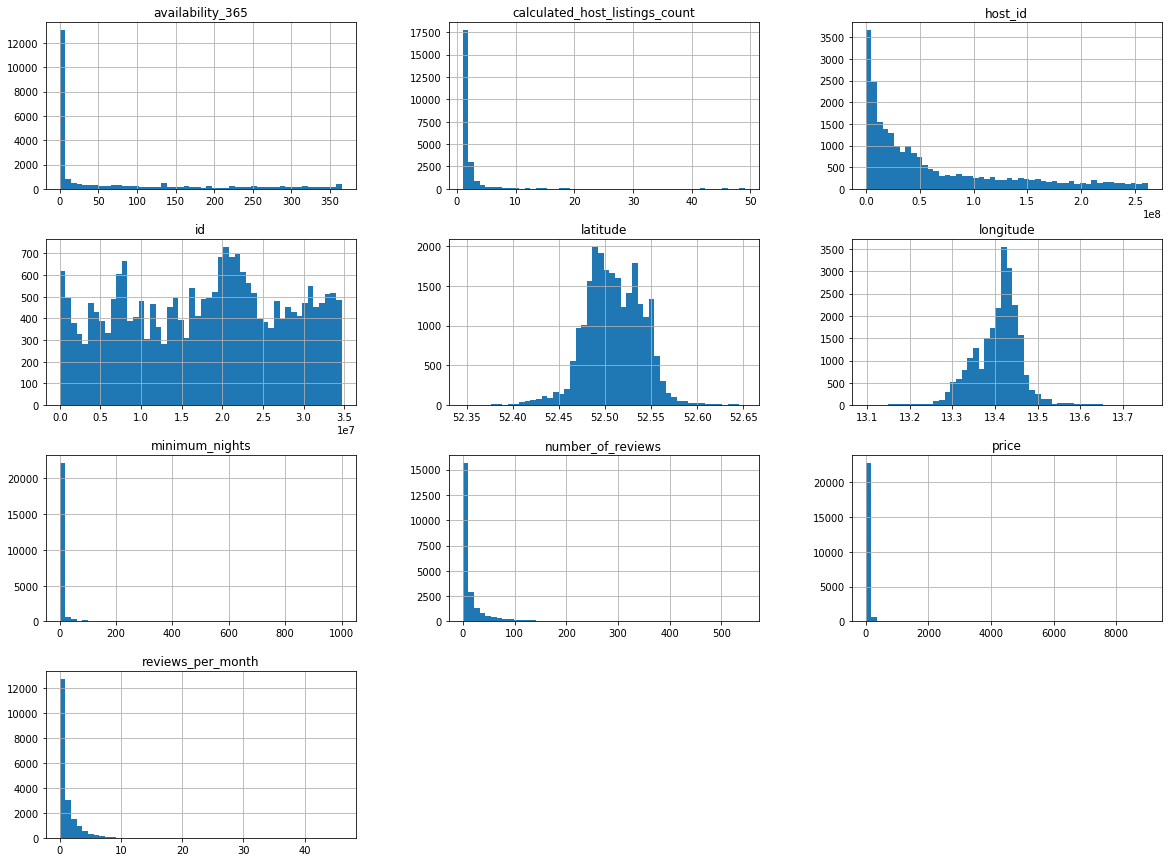

In [11]:
listings.hist(bins=50,figsize=(20,15))
plt.show()